# Movie Recommendation System

Student: Vahe Karapetyan

Supervisor: Habet Madoyan

The goal of the capstone topic is to provide a relevant recommendation system that, based on some inputs and prediction algorithms, comes out with a provided amount of movies the user might be interested in watching.

# Part 1: Exploration of Data

### 1.1 A Quick Preview
### 1.2 The Movies Dataframe
    1.2.1 Genres Column
    1.2.2 Adult Movies Column
### 1.3 Creating Useful Dataframes
### 1.4 Plotting

In [1]:
#Importing the libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

In [2]:
#Storing all the datas in variables

rat = pd.read_csv('ratings_small.csv')
cred = pd.read_csv('credits.csv')
key = pd.read_csv('keywords.csv')
link = pd.read_csv('links_small.csv')
mov = pd.read_csv('movies_metadata.csv')

C:\Program Files (x86)\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## 1.1 A Quick Preview

In [3]:
rat.head(3)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182


In [4]:
rat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
userId       100004 non-null int64
movieId      100004 non-null int64
rating       100004 non-null float64
timestamp    100004 non-null int64
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [5]:
cred.head(3)

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602


In [6]:
cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
cast    45476 non-null object
crew    45476 non-null object
id      45476 non-null int64
dtypes: int64(1), object(2)
memory usage: 710.6+ KB


In [7]:
key.head(3)

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."


In [8]:
key.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46419 entries, 0 to 46418
Data columns (total 2 columns):
id          46419 non-null int64
keywords    46419 non-null object
dtypes: int64(1), object(1)
memory usage: 544.0+ KB


In [9]:
link.head(3)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0


In [10]:
link.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 3 columns):
movieId    9125 non-null int64
imdbId     9125 non-null int64
tmdbId     9112 non-null float64
dtypes: float64(1), int64(2)
memory usage: 213.9 KB


In [11]:
mov.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


Gathering the information about the data types.

In [12]:
mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
adult                    45466 non-null object
belongs_to_collection    4494 non-null object
budget                   45466 non-null object
genres                   45466 non-null object
homepage                 7782 non-null object
id                       45466 non-null object
imdb_id                  45449 non-null object
original_language        45455 non-null object
original_title           45466 non-null object
overview                 44512 non-null object
popularity               45461 non-null object
poster_path              45080 non-null object
production_companies     45463 non-null object
production_countries     45463 non-null object
release_date             45379 non-null object
revenue                  45460 non-null float64
runtime                  45203 non-null float64
spoken_languages         45460 non-null object
status                   45379 non-null objec

## 1.2 The 'mov' Dataframe

### 1.2.1 Genres Column

In [13]:
type(mov.genres)

pandas.core.series.Series

As far as one of our main goals is having a decent view at the genres of the movies, we'll make the 'genres' column more usable. Now, as we see, its type is series, consisting of string elements, hence we cannot use it for our predictor.
To solve this issue, we are making it into dummies.

In [14]:
mov.genres.head()

0    [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
1    [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
2    [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...
3    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
4                       [{'id': 35, 'name': 'Comedy'}]
Name: genres, dtype: object

In [15]:
genres_view=[]
for i in range(mov.shape[0]):
    for genre in json.loads(mov.iloc[i]['genres'].replace("'",'"')):
        genres_view.append(genre['name'])

The genres_view list will have every genre stored separately in it.

In [16]:
genres_view=set(genres_view)

In [17]:
genres_view

{'Action',
 'Adventure',
 'Animation',
 'Aniplex',
 'BROSTA TV',
 'Carousel Productions',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'GoHands',
 'History',
 'Horror',
 'Mardock Scramble Production Committee',
 'Music',
 'Mystery',
 'Odyssey Media',
 'Pulser Productions',
 'Rogue State',
 'Romance',
 'Science Fiction',
 'Sentai Filmworks',
 'TV Movie',
 'Telescene Film Group Productions',
 'The Cartel',
 'Thriller',
 'Vision View Entertainment',
 'War',
 'Western'}

Now, every movie has its row of separate genres. All have a value of 0. So, let's make the necessary genre values 1 for each movie, by browsing through our old 'genres' column and seeing which movie has what genres defined.

In [18]:
for genre_col in genres_view:
    col=pd.Series(np.zeros(mov.shape[0]), index=mov.index)
    mov[genre_col]=col

In [19]:
for i in range(mov.shape[0]):
    for genre in json.loads(mov.iloc[i]['genres'].replace("'",'"')):
        mov.loc[i,genre['name']]=1

As we see, some of them are not even genres, so we simply cut them off in our 'mov' dataset.

In [20]:
mov = mov.drop('Aniplex',axis=1)
mov = mov.drop('BROSTA TV',axis=1)
mov = mov.drop('Carousel Productions',axis=1)
mov = mov.drop('GoHands',axis=1)
mov = mov.drop('Mardock Scramble Production Committee',axis=1)
mov = mov.drop('Odyssey Media',axis=1)
mov = mov.drop('Pulser Productions',axis=1)
mov = mov.drop('Rogue State',axis=1)
mov = mov.drop('Sentai Filmworks',axis=1)
mov = mov.drop('TV Movie',axis=1)
mov = mov.drop('Telescene Film Group Productions',axis=1)
mov = mov.drop('The Cartel',axis=1)
mov = mov.drop('Vision View Entertainment',axis=1)

In [21]:
mov.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,Crime,Romance,Fantasy,Science Fiction,Western,Mystery,Animation,Action,Comedy,War
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [22]:
mov = mov.drop('genres',axis=1)

There we have it. Genres are in dummies form now.
Now let's move on to the other object types to see which columns can we simplify (encode, make dummies, etc).

### 1.2.2 Adult Movies Column

In [23]:
for i in range(len(mov.dtypes)):
    if (mov.dtypes[i] == 'object'):
        print("|||", mov.columns.values[i], "->", mov.iloc[:,i].unique())

||| adult -> ['False' 'True' ' - Written by Ørnås'
 ' Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.'
 ' Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.']
||| belongs_to_collection -> [ "{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg', 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'}"
 nan
 "{'id': 119050, 'name': 'Grumpy Old Men Collection', 'poster_path': '/nLvUdqgPgm3F85NMCii9gVFUcet.jpg', 'backdrop_path': '/hypTnLot2z8wpFS7qwsQHW1uV8u.jpg'}"
 ...,
 "{'id': 148603, 'name': 'Ducobu Collection', 'poster_path': '/rd7AWZUy2QFPIblNWToVmdfXQcA.jpg', 'backdrop_path': '/7mzKmoIrvGapvsSbAVlX4HtCnFj.jpg'}"
 "{'id': 152918, 'name': 'Mister Blot Collection', 'poster_path': '/44PYEwwjGts8pAob59RHd6zlkKc.jpg', 'backdrop_path': '/5uoPsNiFpUYNamSGqE8okN27VRK.jpg'}"
 "{'id': 200641, 'name': 'Red Lotus Collecti

We see the column 'adult' is determining whether the film is for adult viewing or not. So it can be comprehended as a True/False column. But the values are in string form and some rows contain values other than "True" or "False". So we encode the column into 0s and 1s, cutting off the rows containing anything other than True/False.

In [24]:
adult_l=[]
for i in range(mov.shape[0]):
    adult_l.append(mov.iloc[i]['adult'])

In [25]:
adult_l = set(adult_l)
adult_l

{' - Written by Ørnås',
 ' Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.',
 ' Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.',
 'False',
 'True'}

In [26]:
for i in adult_l:
    if i!='True' and i!='False':
        mov = mov[mov.adult != i]

In [27]:
mov.adult.value_counts()

False    45454
True         9
Name: adult, dtype: int64

In [28]:
#encoding

for i in range(mov.shape[0]):
    if mov.iloc[i]['adult'] == 'False':
        mov.loc[i,'adult'] = 0
    elif mov.iloc[i]['adult'] == 'True':
        mov.loc[i,'adult'] = 1

In [29]:
mov.head(3)

,adult,belongs_to_collection,budget,homepage,id,imdb_id,original_language,original_title,overview,popularity,...,Crime,Romance,Fantasy,Science Fiction,Western,Mystery,Animation,Action,Comedy,War
0,0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0,NaN,65000000,NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [30]:
mov = mov.drop('homepage',axis=1)
mov = mov.drop('overview',axis=1)

In [31]:
mov.head()

,adult,belongs_to_collection,budget,id,imdb_id,original_language,original_title,popularity,poster_path,production_companies,...,Crime,Romance,Fantasy,Science Fiction,Western,Mystery,Animation,Action,Comedy,War
0,0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,862,tt0114709,en,Toy Story,21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]",...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0,NaN,65000000,8844,tt0113497,en,Jumanji,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,15602,tt0113228,en,Grumpier Old Men,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,NaN,16000000,31357,tt0114885,en,Waiting to Exhale,3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,"{'id': 96871, 'name': 'Father of the Bride Col...",0,11862,tt0113041,en,Father of the Bride Part II,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## 1.3 Creating Useful Dataframes 

In [32]:
#convert strings to numeric

mov.budget = pd.to_numeric(mov.budget)
mov.popularity = pd.to_numeric(mov.popularity)

In [33]:
#rename columns with space in its name

mov = mov.rename(columns={'Science Fiction': 'SciFi'})

In [34]:
#drop the movies with low popularity and number of votes

mov = mov[mov.vote_count >= 10]
mov = mov[mov.popularity >= 3]

Below we create some dataframes and assign them for further use. There might be some additions here in the future as well.

In [35]:
mov_most_budget = mov.sort_values(by=['budget'], ascending=False)
mov_most_popular = mov.sort_values(by=['popularity'], ascending=False)
mov_highest_rated = mov.sort_values(by=['vote_average'], ascending=False)
mov_most_voted = mov.sort_values(by=['vote_count'], ascending=False)
english_movies = mov[mov.original_language=='en']
mov_comedy = mov[mov.Comedy==1]
mov_comedy_rated = mov_comedy.sort_values(by=['vote_average'], ascending=False)

Uncomment any of the lines below to view a certain sorting of the dataset.

In [36]:
#mov_most_budget.loc[:, ['original_title', 'budget']]
#mov_highest_rated[mov_highest_rated.vote_average > 8.5].loc[:, ['original_title', 'original_language', 'vote_average', 'vote_count']]
#mov_most_voted[mov_most_voted.vote_count>=5000].loc[:, ['original_title','vote_count']]
#mov_comedy_rated.loc[:, ['original_title', 'original_language', 'vote_average', 'popularity']]

#write your own
#_____________________________________________________________

Also, we filter our dataframe with only numeric values.

In [37]:
mov_num = mov.select_dtypes(include=['float64'])

In [38]:
mov_num.head()

,budget,popularity,revenue,runtime,vote_average,vote_count,History,Music,Family,Thriller,...,Crime,Romance,Fantasy,SciFi,Western,Mystery,Animation,Action,Comedy,War
0,30000000.0,21.946943,373554033.0,81.0,7.7,5415.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,65000000.0,17.015539,262797249.0,104.0,6.9,2413.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,11.712900,0.0,101.0,6.5,92.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,16000000.0,3.859495,81452156.0,127.0,6.1,34.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,8.387519,76578911.0,106.0,5.7,173.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


We will need one with only the dummies of the genres as well.

In [39]:
mov_genres = mov_num.drop(['budget','revenue','runtime','vote_average','vote_count','popularity'],axis=1)

In [40]:
mov_genres.head()

,History,Music,Family,Thriller,Foreign,Drama,Adventure,Horror,Documentary,Crime,Romance,Fantasy,SciFi,Western,Mystery,Animation,Action,Comedy,War
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [41]:
mov_genres = mov_genres.join(mov.original_title)

In [42]:
mov_genres.head(3)

,History,Music,Family,Thriller,Foreign,Drama,Adventure,Horror,Documentary,Crime,Romance,Fantasy,SciFi,Western,Mystery,Animation,Action,Comedy,War,original_title
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,Toy Story
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Jumanji
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Grumpier Old Men


In [43]:
cols = mov_genres.columns.tolist()
cols = cols[-1:] + cols[:-1]

cols

['original_title',
 'History',
 'Music',
 'Family',
 'Thriller',
 'Foreign',
 'Drama',
 'Adventure',
 'Horror',
 'Documentary',
 'Crime',
 'Romance',
 'Fantasy',
 'SciFi',
 'Western',
 'Mystery',
 'Animation',
 'Action',
 'Comedy',
 'War']

In [44]:
mov_genres = mov_genres[cols]
mov_genres.head(3)

,original_title,History,Music,Family,Thriller,Foreign,Drama,Adventure,Horror,Documentary,Crime,Romance,Fantasy,SciFi,Western,Mystery,Animation,Action,Comedy,War
0,Toy Story,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,Jumanji,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Grumpier Old Men,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## 1.4 Plotting

In [45]:
bars = []
for i in range(len(cols)):
    x = mov_genres[mov_genres[cols[i]]==1.0][cols[i]].sum()/len(mov_genres)*100
    bars.append(x)

In [46]:
bars

[0.0,
 3.922972865441235,
 3.230683536245723,
 9.564733030954088,
 26.61733110527572,
 0.15914697222885335,
 47.72021962282167,
 13.678682263069945,
 13.75029840057293,
 2.1803135195352907,
 13.90148802419034,
 16.893451102092783,
 8.44274687674067,
 10.257022360149598,
 2.0370812445293227,
 7.551523832259091,
 6.493196466937216,
 22.16121588286783,
 34.78952812922734,
 3.2545555820800507]

In [47]:
bars = bars[1:]

In [48]:
type(bars)

list

In [49]:
names = np.array(cols[1:])
bars = np.array(bars)

In [50]:
n = np.arange(1,20)
n

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

Here is a barplot showing the percentages of each genre in our dummies. 

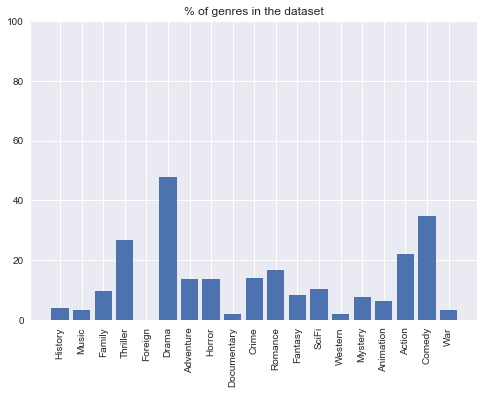

In [51]:
plt.xticks(n, cols[1:], rotation=90)
plt.title('% of genres in the dataset')
plt.bar(n, bars)
plt.ylim(0,100)
plt.show()

The heatmap shows the correlation between the genres in our dataset.

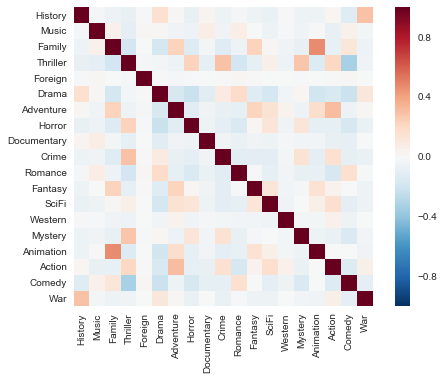

In [52]:
sns.heatmap(mov_genres.corr(), square=True)
plt.show()

## Year

In [69]:
mov = mov[mov['release_date'].apply(lambda x: type(x)==str)]

In [70]:
mov.release_date

0        1995-10-30
1        1995-12-15
2        1995-12-22
3        1995-12-22
4        1995-02-10
5        1995-12-15
6        1995-12-15
8        1995-12-22
9        1995-11-16
10       1995-11-17
11       1995-12-22
12       1995-12-22
13       1995-12-22
14       1995-12-22
15       1995-11-22
16       1995-12-13
17       1995-12-09
18       1995-11-10
19       1995-11-21
20       1995-10-20
21       1995-10-27
22       1995-10-06
23       1995-10-27
24       1995-10-27
26       1995-10-20
28       1995-05-16
30       1995-08-11
31       1995-12-29
33       1995-07-18
35       1995-12-29
            ...    
45177    2016-10-19
45183    2016-01-01
45184    2017-08-01
45200    2017-07-12
45202    2017-07-07
45204    2017-07-21
45206    2017-07-28
45225    2017-07-18
45232    2011-06-22
45238    2017-02-01
45239    2017-05-26
45244    1969-05-09
45252    2017-07-21
45254    2010-12-13
45258    2017-07-21
45265    2014-08-15
45268    2016-02-24
45335    2017-02-03
45339    2017-04-05


In [72]:
release_year = []
for i in range(mov.shape[0]):
    release_year.append(mov.iloc[i]['release_date'][:4])
    
print(release_year)

['1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1994', '1995', '1996', '1995', '1996', '1996', '1995', '1995', '1996', '1995', '1995', '1996', '1995', '1995', '1996', '1995', '1996', '1996', '1996', '1995', '1996', '1995', '1996', '1996', '1995', '1996', '1996', '1996', '1996', '1995', '1996', '1995', '1976', '1995', '1995', '1992', '1994', '1996', '1994', '1995', '1996', '1996', '1996', '1995', '1995', '1995', '1995', '1995', '1995', '1967', '1995', '1995', '1995', '1995', '1995', '1995', '1994', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1995', '1994', '1995', '1995', '1995', '1995', '1995',

In [76]:
release_year = pd.to_numeric(release_year)

In [81]:
import pickle

In [82]:
with open('mov.pkl','wb') as f:
        pickle.dump(mov,f)

In [78]:
type(release_year)

numpy.ndarray

In [79]:
type(mov.Comedy)

pandas.core.series.Series